In [1]:
import sys     # !{sys.executable} -m pip install ta
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import datetime as dt

In [2]:
# https://rapidapi.com/apidojo/api/yahoo-finance1
# https://rapidapi.com/blog/yahoo-finance-api-python/

# read in Nasdaq data, large amount of data that is hard to API for
data_file = 'Nasdaq_History_All_thru2020.csv'  # downloaded from yahoo finance
df = pd.read_csv(data_file)
last_update = str(dt.date.today())
x = df['Date']
y = df['Close']

# datetime.timestamp()
df['date_time'] = [datetime.strptime(d, '%m/%d/%Y') for d in df['Date']]
df['date_time'] = [datetime.timestamp(d) for d in df['date_time']] # utcfromtimestamp for accurate date
df.to_csv(f"fileOne.csv", index = False, header=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,date_time
0,2/8/1971,100.839996,100.839996,100.839996,100.839996,100.839996,0,3.483720e+07
1,2/9/1971,100.760002,100.760002,100.760002,100.760002,100.760002,0,3.492360e+07
2,2/10/1971,100.690002,100.690002,100.690002,100.690002,100.690002,0,3.501000e+07
3,2/11/1971,101.449997,101.449997,101.449997,101.449997,101.449997,0,3.509640e+07
4,2/12/1971,102.050003,102.050003,102.050003,102.050003,102.050003,0,3.518280e+07
...,...,...,...,...,...,...,...,...
12582,12/24/2020,12791.540040,12833.549810,12767.639650,12804.730470,12804.730470,3305950000,1.608786e+09
12583,12/28/2020,12914.639650,12930.889650,12827.450200,12899.419920,12899.419920,5076340000,1.609132e+09
12584,12/29/2020,12965.389650,12973.330080,12821.959960,12850.219730,12850.219730,4680780000,1.609218e+09
12585,12/30/2020,12906.509770,12924.929690,12857.759770,12870.000000,12870.000000,5292210000,1.609304e+09


In [3]:
# allows plotting of graph by date and axis shows in years
df.set_index('Date',inplace = True)

In [4]:
max_date = df['date_time'].max()   # Use this in future to update date on graph, convert from timestamp

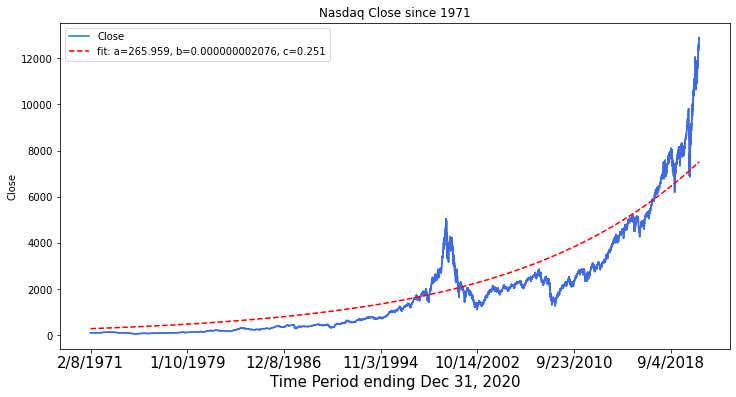

In [5]:
# Create graph of nasdaq data
df[['Close']].plot(figsize=(12,6))
x_sec = df['date_time']
plt.title(f"Nasdaq Close since 1971")
plt.ylabel("Close")
plt.xlabel(f"Time Period ending Dec 31, 2020", fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.plot(x,y, color='royalblue')

# fit exponential curve to graph
def func(x, a, b, c):
    return a * np.exp(b * x) + c
# predicted value from python, fits slightly different than Excel fit
popt, pcov = curve_fit(func, x_sec, y, bounds=(0, [380, .000000002362, 1]))
popt
plt.plot(x, func(x_sec, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.12f, c=%5.3f' % tuple(popt), color='red')

plt.legend()
plt.show()

In [6]:
# exponetial values copied from Excel fitted curve
a,b,c = tuple(popt)
a = 67.928
b = 0.000000003048
c = 25

In [7]:
df['predicted'] = [func(d,a,b,c) for d in df['date_time']] # utcfromtimestamp for accurate date
df

,Open,High,Low,Close,Adj Close,Volume,date_time,predicted
Date,,,,,,,,
2/8/1971,100.839996,100.839996,100.839996,100.839996,100.839996,0,3.483720e+07,100.537718
2/9/1971,100.760002,100.760002,100.760002,100.760002,100.760002,0,3.492360e+07,100.557613
2/10/1971,100.690002,100.690002,100.690002,100.690002,100.690002,0,3.501000e+07,100.577514
2/11/1971,101.449997,101.449997,101.449997,101.449997,101.449997,0,3.509640e+07,100.597419
2/12/1971,102.050003,102.050003,102.050003,102.050003,102.050003,0,3.518280e+07,100.617330
...,...,...,...,...,...,...,...,...
12/24/2020,12791.540040,12833.549810,12767.639650,12804.730470,12804.730470,3305950000,1.608786e+09,9179.749079
12/28/2020,12914.639650,12930.889650,12827.450200,12899.419920,12899.419920,5076340000,1.609132e+09,9189.397671
12/29/2020,12965.389650,12973.330080,12821.959960,12850.219730,12850.219730,4680780000,1.609218e+09,9191.811407


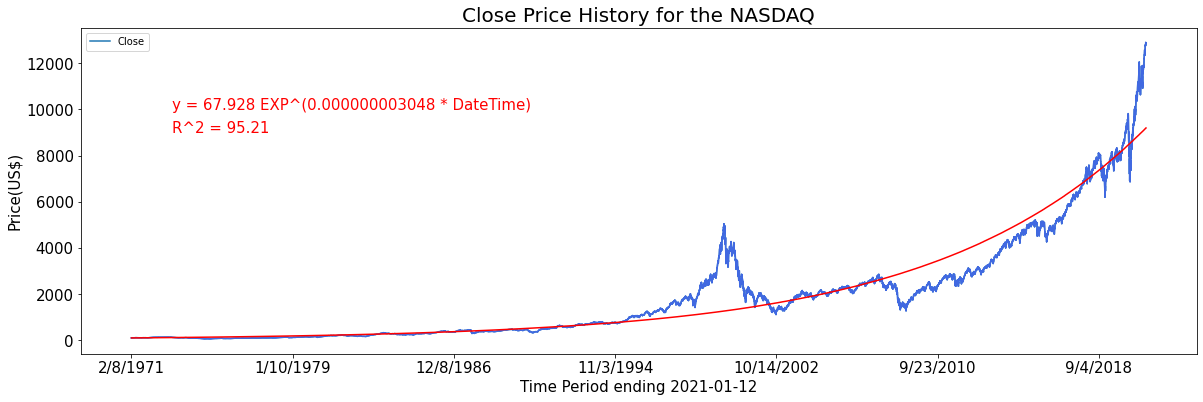

In [8]:
 # date makes no big changes from date_time
# df.set_index('Date',inplace = True)
df[['Close']].plot(figsize=(20,6))
y_pred = df['predicted']
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.title(f"Close Price History for the NASDAQ", size = 20)
plt.ylabel("Price(US$)", fontsize=15)
plt.xlabel(f"Time Period ending {last_update}", fontsize=15)
# file_name = f"Images/{stock}vs{time}.png"
plt.plot(x,y, color='royalblue')
plt.plot(x, y_pred, color='red')
plt.annotate('y = 67.928 EXP^(0.000000003048 * DateTime)',(500,10000), color = 'red', size=15)
plt.annotate('R^2 = 95.21',(500,9000), color = 'red', size=15)
plt.savefig('nasdaq.png')